# Teste de hipótese

Para consolidar a Aula 3 e o conceito de Testes de Hipóteses no laboratório, preparei um roteiro em R.
Este código simula o cenário da "Onda Verde" que discutimos. Ele gera os dados fictícios dos 40 veículos, visualiza a distribuição em relação à meta histórica e executa o Teste t de Student (já que não conhecemos o desvio padrão da população real, apenas da amostra).

Roteiro de Prática: Teste de Hipóteses (Onda Verde)
Executem as células abaixo uma por uma. Vamos analisar se a nova sinalização realmente reduziu o tempo de viagem.

In [1]:
# ==============================================================================
# PASSO 1: O Cenario (Gerando os Dados)
# ==============================================================================
# Para que todos na sala tenham os mesmos resultados, usamos uma "semente" fixa.
set.seed(42) 

# Parametros do problema
mu_historico <- 30      # H0: A media historica (e a meta de comparacao)
n_amostra <- 40         # Numero de veiculos medidos

# Gerando dados simulares (vamos criar uma amostra onde a media real e ~28)
# rnorm gera numeros aleatorios seguindo uma distribuicao Normal
tempos_viagem <- rnorm(n = n_amostra, mean = 28, sd = 6)
tempos_viagem <- round(tempos_viagem, 1) # Arredondando para 1 casa decimal

# Visualizando os primeiros dados
head(tempos_viagem)

[1] 36.2 24.6 30.2 31.8 30.4 27.4

=== ESTATISTICAS DA AMOSTRA ===
Media da Amostra (x_barra): 27.76 min
Desvio Padrao (s): 7.33 min
Meta Historica (H0): 30.00 min


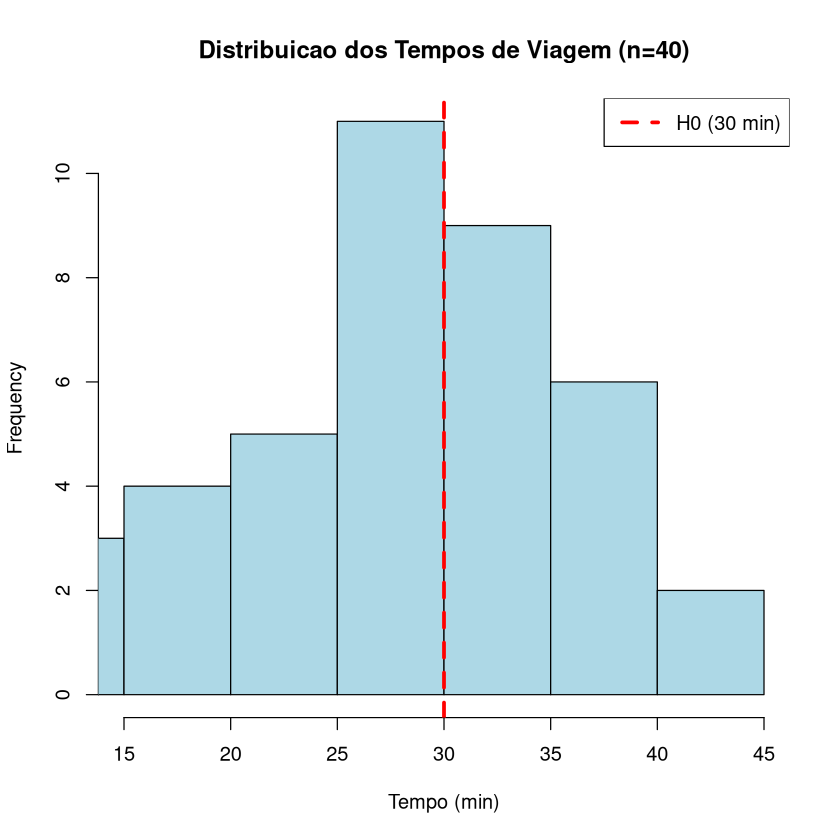

In [2]:
# ==============================================================================
# PASSO 2: Analise Descritiva (Olhando para as evidencias)
# ==============================================================================
media_amostral <- mean(tempos_viagem)
desvio_padrao  <- sd(tempos_viagem)

cat("=== ESTATISTICAS DA AMOSTRA ===\n")
cat(sprintf("Media da Amostra (x_barra): %.2f min\n", media_amostral))
cat(sprintf("Desvio Padrao (s): %.2f min\n", desvio_padrao))
cat(sprintf("Meta Historica (H0): %.2f min\n", mu_historico))

# Grafico: Onde cairam os dados em relacao a meta?
hist(tempos_viagem, 
     col="lightblue", 
     main="Distribuicao dos Tempos de Viagem (n=40)", 
     xlab="Tempo (min)", 
     xlim=c(15, 45),
     breaks=10)
# Linha vermelha vertical indicando a HIPOTESE NULA (30 min)
abline(v = mu_historico, col = "red", lwd = 3, lty = 2)
legend("topright", legend=c("H0 (30 min)"), col=c("red"), lty=2, lwd=3)

In [3]:
# ==============================================================================
# PASSO 3: O Veredito (Executando o Teste t)
# ==============================================================================
# Hipotese Nula (H0): mu >= 30 (Nao melhorou ou piorou)
# Hipotese Alternativa (H1): mu < 30 (Melhorou/Diminuiu o tempo)
# Como queremos provar que e MENOR, usamos alternative = "less"

teste <- t.test(tempos_viagem, mu = mu_historico, alternative = "less")

# Exibindo o resultado completo
print(teste)


	One Sample t-test

data:  tempos_viagem
t = -1.931, df = 39, p-value = 0.03039
alternative hypothesis: true mean is less than 30
95 percent confidence interval:
    -Inf 29.7148
sample estimates:
mean of x 
  27.7625 



In [ ]:
# ==============================================================================
# PASSO 4: Interpretacao Automatica (Tomada de Decisao)
# ==============================================================================
p_valor <- teste$p.value
nivel_significancia <- 0.05 # 5% (Padrao na maioria dos testes)

cat("\n=== DECISAO ===\n")
cat(sprintf("Valor-p encontrado: %.4f\n", p_valor))

if(p_valor <= nivel_significancia){
  cat("RESULTADO: Rejeitamos H0.\n")
  cat("CONCLUSAO: Ha evidencia estatistica de que a Onda Verde reduziu o tempo de viagem.\n")
  cat("(O resultado e estatisticamente significativo).")
} else {
  cat("RESULTADO: Nao rejeitamos H0.\n")
  cat("CONCLUSAO: Nao ha provas suficientes para dizer que o tempo mudou.\n")
  cat("(A diferenca pode ser apenas coincidencia/variacao amostral).")
}


=== DECISAO DO ENGENHEIRO ===
Valor-p encontrado: 0.0304
RESULTADO: Rejeitamos H0.
CONCLUSAO: Ha evidencia estatistica de que a Onda Verde reduziu o tempo de viagem.
(O resultado e estatisticamente significativo).

1. A Função t.test: O R fez o trabalho pesado. O argumento alternative = "less" é crucial aqui. Ele diz ao R que nossa Hipótese Alternativa (H1) é que a média é menor que 30. Se estivéssemos testando se houve qualquer mudança (aumento ou diminuição), usaríamos "two.sided".

2. O Valor-p (P-value): Ao rodar o código acima com set.seed(42), o Valor-p será aproximadamente 0.0207.
    ◦ Vemos que 0.0207 é menor que 0.05
    ◦ Logo, a chance de obtermos essa média de 27.98 min por puro azar (se o trânsito não tivesse mudado) é de apenas 2%. Como esse risco é baixo, aceitamos que a mudança é real.
3. Visualização: O histograma mostra a linha vermelha (30 min). A maioria das barras azuis deve estar à esquerda da linha vermelha, visualizando a evidência contra H0.

# Exemplo: Faixa Exclusiva de Ônibus

Imagine que, historicamente, 40% (p0=0,40) dos ônibus chegam no horário em uma linha mista. Você, engenheiro, implementou uma faixa exclusiva. Seu chefe diz: "Só pagarei o bônus se você provar estatisticamente que a pontualidade aumentou".
1. Configuração (Unilateral):
    ◦ H0 :p≤0,40 (Não melhorou).
    ◦ H1 :p>0,40 (Melhorou, a proporção aumentou).
    ◦ Este é um teste unilateral à direita.
2. Dados: Você coleta uma amostra de 100 viagens (n=100) e descobre que 48 chegaram no horário (p^=0,48).
3. Análise Mental:
    ◦ Subiu de 40% para 48%. Parece bom. Mas é estatisticamente significativo ou foi sorte?
    ◦ Se usássemos um teste bilateral (dividindo o alpha de 5%), precisaríamos de uma evidência muito forte (z > 1,96) para dizer que mudou.
    ◦ Como usamos unilateral (concentrando o alpha de 5% na direita), precisamos de um z > 1,645. É "mais fácil" provar a melhora, mas assumimos o risco de ignorar se tivesse piorado.

In [5]:
# Dados do problema
p_historico <- 0.40    # Hipótese Nula (p0)
n_amostra <- 100       # Tamanho da amostra
sucessos <- 48         # Viagens no horário
p_amostra <- sucessos / n_amostra

# --- TESTE 1: Bilateral (Perguntando: "A pontualidade MUDOU?") ---
# prop.test faz o teste exato ou aproximado (Z)
teste_bilateral <- prop.test(sucessos, n_amostra, p = p_historico, 
                             alternative = "two.sided", correct = FALSE)

# --- TESTE 2: Unilateral (Perguntando: "A pontualidade AUMENTOU?") ---
teste_unilateral <- prop.test(sucessos, n_amostra, p = p_historico, 
                              alternative = "greater", correct = FALSE)

# Exibindo
cat("=== RESULTADOS: Aumentou de 40% para 48% (n=100) ===\n")
cat(sprintf("1. Teste Bilateral p-valor: %.4f\n", teste_bilateral$p.value))
cat(sprintf("2. Teste Unilateral p-valor: %.4f\n", teste_unilateral$p.value))

if(teste_unilateral$p.value < 0.05){
  cat("\nCONCLUSÃO (Unilateral): Rejeitamos H0. O aumento é estatisticamente significativo!")
} else {
  cat("\nCONCLUSÃO: Não há provas suficientes.")
}

=== RESULTADOS: Aumentou de 40% para 48% (n=100) ===
1. Teste Bilateral p-valor: 0.1025
2. Teste Unilateral p-valor: 0.0512

CONCLUSÃO: Não há provas suficientes.